In [1]:
# import dependencies
import nltk
import pandas as pd
import os
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

In [2]:
# load tweets into a dataframe
df = pd.read_json(os.path.join('condensed_2018.json'))
# drop retweets
dfRt = df[~df.text.str.startswith('RT')]
# Reset index
dfRt = dfRt.reset_index(drop=True)

In [3]:
# create day of the week column for plotting
# next steps: make columns for hour, month, year for additional plots
dfRt['created_at'] = pd.to_datetime(dfRt['created_at'])

dfRt['month_of_year'] = dfRt['created_at'].dt.month_name()

In [4]:
# ser variable for seniment analyzer
sid = SentimentIntensityAnalyzer()

# set text column to a varible for vader analysis
sentences = dfRt["text"]

# create list for polarity scores
vScore = []

# run vader on text
for sentence in sentences:
    ss = sid.polarity_scores(sentence)

# append score to list
    vScore.append((ss.get("compound")))

# add list to dataframe for plotting
dfRt["vScore"]= pd.DataFrame(vScore)

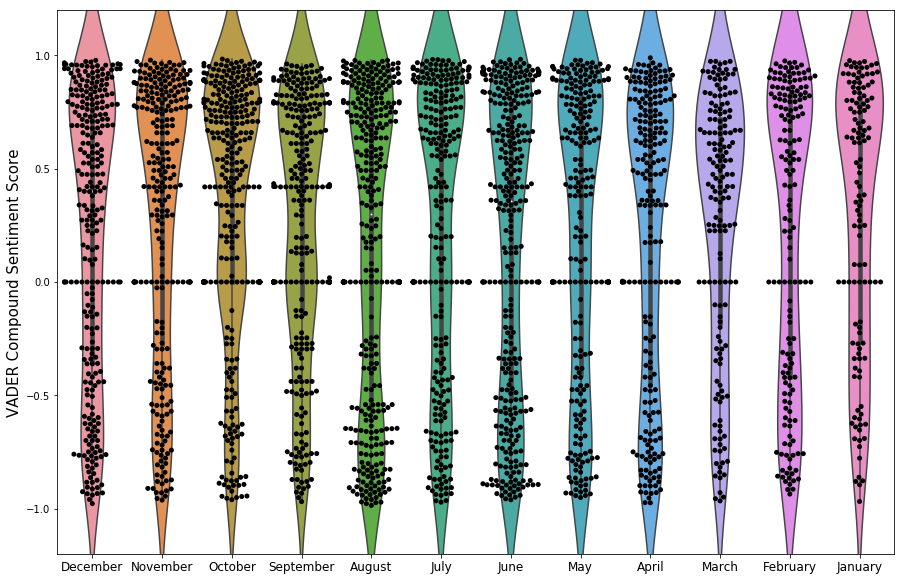

In [5]:
# plot sentiment of tweets according to day of the week
plt.close()
plt.figure(figsize=(15,10))
plt.ylim(-1.2,1.2)
sns.violinplot(x='month_of_year',y='vScore',data=dfRt)
sns.swarmplot(x="month_of_year", y="vScore",data=dfRt, color="black")
plt.xlabel('')
plt.xticks(size=12)
plt.ylabel('VADER Compound Sentiment Score',size=15)
plt.savefig('Season1.png')